> https://bcho.tistory.com/1203?category=555440

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data/최종.csv', encoding = 'euc_kr')
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'data/최종.csv'

In [3]:
features = df.loc[:, ['주차수요량', '카드이용자수', '사업체수']]
features.head(3)

,주차수요량,카드이용자수,사업체수
0,55071,269222,281
1,65333,441864,991
2,75072,362387,269


# 군집수 판단

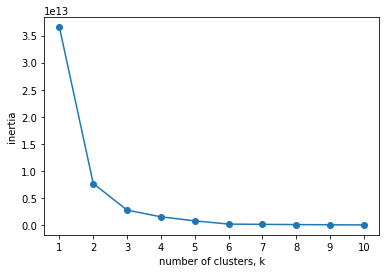

In [4]:
ks = range(1, 11)
inertias = []

for k in ks :
    model = KMeans(n_clusters = k)
    model.fit(features)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k' )
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [5]:
model = KMeans(n_clusters=3, algorithm='auto')
model.fit(features)

predict = pd.DataFrame(model.predict(features))
predict.columns = ['predict']
predict

,predict
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [6]:
r = pd.concat([df['읍면동'] ,features, predict], axis = 1)
r

,읍면동,주차수요량,카드이용자수,사업체수,predict
0,이호동,55071,269222,281,1
1,도두동,65333,441864,991,1
2,봉개동,75072,362387,269,1
3,외도동,75466,944828,1185,1
4,삼양동,78848,1042792,1000,1
5,건입동,113170,763641,750,1
6,화북동,130560,1025585,1546,1
7,구좌읍,146522,952715,1738,1
8,한림읍,233952,1377325,2174,1
9,오라동,183289,854466,978,1


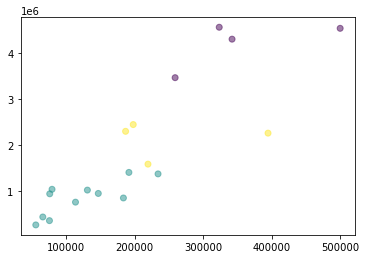

In [7]:
plt.scatter(r['주차수요량'], r['카드이용자수'], c = r['predict'], alpha = 0.5)

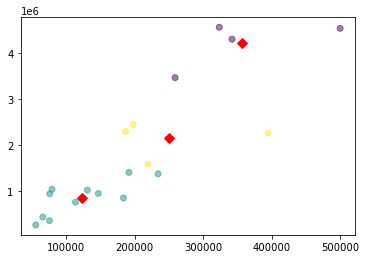

In [8]:
centers = pd.DataFrame(model.cluster_centers_, columns = ['주차수요량', '카드이용자수'])
center_x = centers['주차수요량']
center_y = centers['카드이용자수']
plt.scatter(r['주차수요량'], r['카드이용자수'], c = r['predict'], alpha = 0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c ='r')
plt.show()

# 스케일링

In [8]:
scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, model)

In [9]:
pipeline.fit(features)
predict = pd.DataFrame(pipeline.predict(features))
predict.columns = ['predict']
predict

,predict
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,0
9,2


In [10]:
a = pd.concat([df['읍면동'] ,features, predict], axis = 1)
a

,읍면동,주차수요량,카드이용자수,사업체수,predict
0,이호동,55071,269222,281,2
1,도두동,65333,441864,991,2
2,봉개동,75072,362387,269,2
3,외도동,75466,944828,1185,2
4,삼양동,78848,1042792,1000,2
5,건입동,113170,763641,750,2
6,화북동,130560,1025585,1546,2
7,구좌읍,146522,952715,1738,2
8,한림읍,233952,1377325,2174,0
9,오라동,183289,854466,978,2


In [1]:
a.to_csv('kmeans.csv', encoding = 'euc_kr')

NameError: name 'a' is not defined

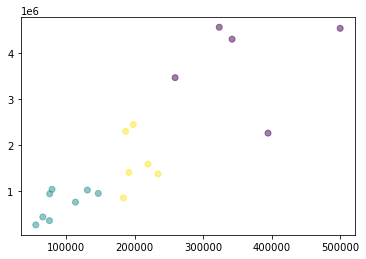

In [13]:
plt.scatter(a['주차수요량'], a['카드이용자수'], c = a['predict'], alpha = 0.5)
plt.show()